111
0.9190950681780552
44.446666666666665
global distance =  -1
111
0.9190950681780552
50.16
global distance =  -1
111
111
0.9190950681780552
37.46666666666667
global distance =  -1
111
111
111
111
0.9190950681780552
47.626666666666665
global distance =  -1
111
111
111
0.9190950681780552
49.85333333333333
global distance =  -1
111
111
111
111
0.9190950681780552
49.02
global distance =  -1
111
111
0.9190950681780552
37.04
global distance =  -1
111
111
0.9190950681780552
38.86666666666667
global distance =  -1
111
111
0.9190950681780552
61.36
global distance =  -1
111
111
111
111
'\r\n' is not in list
111
0.9190950681780552
52.36666666666667
global distance =  -1
111
111
0.9190950681780552
46.06
global distance =  -1
111
111
0.9190950681780552
44.14
global distance =  -1
111
111
0.9190950681780552
45.553333333333335
global distance =  -1
111
111
'\r\n' is not in list
111
0.9190950681780552
50.473333333333336
global distance =  -1
111
'\r\n' is not in list
111
0.9190950681780552
62.726666

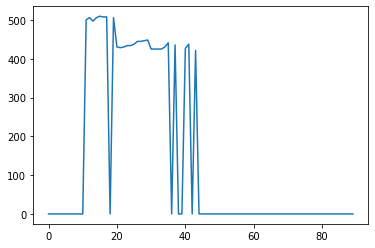

111
111


NameError: name 'my_sample_z' is not defined

In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
import serial
import time
from enum import Enum
import json
from radar_configuration import Radar
from threading import Thread
import matplotlib.pyplot as plt

configuration_file = open('configuration.json',)
configuration_json = json.load(configuration_file)
arduino_port = configuration_json["ARDUINO_PORT"]

stepAngle = configuration_json["STEP_ANGLE"]

scanningLowerStepSize = configuration_json["LOWER_STEP_SIZE"]
scanningUpperStepSize = configuration_json["UPPER_STEP_SIZE"]

maxAngleUpper = configuration_json["MAX_ANGLE_UPPER"]
maxStepsOfUpper =90#maxAngleUpper/(stepAngle*scanningUpperStepSize)

maxAngleLower = configuration_json["MAX_ANGLE_LOWER"]
maxStepsOfLower = 90#maxAngleLower/(stepAngle*scanningLowerStepSize)

# calibrateLowerStepSize = 50
# calibrateLowerTotalStepsCount = 50


class Motors(Enum):
    LOWER = 'l'
    UPPER = 'u'


# class Direction(Enum):
#     POSITIVE = 1
#     NEGATIVE = -1



# radar = Radar()
# radar.setup_radar()
# global_distance = -1
# def get_readings_thread():
#     global global_distance
#     while(True):
#         global_distance = radar.get_median_distance(1)       
#         print("global distance = ",global_distance)


# def set_up():
#     arduino = serial.Serial()
#     arduino.baudrate = 9600
#     arduino.port = arduino_port
#     arduino.open()
#     #print(arduino.is_open)
#     #print(arduino.readline())
#     return arduino


# """
# if face was found return the direction of the lower motor 
# else return none
# """


# def calibrateLower():    
#     detect = False
#     count = 0
#     # looping until face is found or rotated 90 degrees to the right
#     while(count < calibrateLowerTotalStepsCount):
#         moveMotor(Motors.LOWER.value, calibrateLowerStepSize,
#                   Direction.POSITIVE.value)
#         count += 1
#         result = radar.get_median_distance(1) 
#         if result != -1:
#             detect = True
                 
#         if(detect):
#             return Direction.POSITIVE.value  # return that a face is found when rotating right
#     moveMotor(Motors.LOWER.value, calibrateLowerStepSize *
#               calibrateLowerTotalStepsCount, Direction.NEGATIVE.value)
#     count = 0
#     # looping until face is found or rotated 90 degrees to the left
#     while(not detect and count > -1 * calibrateLowerTotalStepsCount):
#         moveMotor(Motors.LOWER.value, calibrateLowerStepSize,
#                   Direction.NEGATIVE.value)
#         count -= 1
#         result = radar.get_median_distance(1) 
#         if result != -1:
#             detect = True
#         if(detect):
#             return Direction.NEGATIVE.value  # return that a face is found when rotating left
#     return None


# """
# Moves motor in arduino
# motor --> can be either 'l' for lower motor 
#           or  'u' for upper motor
# stepSize --> (integer) number of steps that the motor will move (step = 0.45 angle)
# direction -->  either -1 or 1 
# """


# def moveMotor(motor: Motors, stepSize, direction: Direction):
#     txt = motor + str(direction * stepSize) + "$"
#     arduino.write(bytes(txt, 'utf-8'))
#     time.sleep(.7)
#     arduino.readline()


# def scanFace(lowerDirection):
#     global global_distance
#     upperDirection = True
    
    moveU = True
    moveL = True
    counter =0
    uCounter = 0
    lCounter = 0
    count = 0
    dResult =[]
    uResult = []
    lResult = []
    while(moveL):
        while(moveU):
            if(upperDirection):
                moveMotor(Motors.UPPER.value, scanningUpperStepSize,
                          Direction.POSITIVE.value)
                uCounter += 1
                count+=1
            else:
                moveMotor(Motors.UPPER.value, scanningUpperStepSize,
                          Direction.NEGATIVE.value)
                uCounter -= 1
                count+=1
            
            distance = global_distance
            print("##############scanFace###############")
            print("upperMoter.distance = ",distance)
            print("upperMoter.count = ",count)
            print("upperMoter.uCounter = ",uCounter)
            print("upperMoter.lCounter = ",lCounter)
            print("######################################")
            if (distance != -1):
                dResult.append(distance)
                uResult.append((uCounter *scanningUpperStepSize* 0.45*np.pi)/180)
                lResult.append((lCounter * scanningLowerStepSize * 0.45*np.pi)/180)
           
            if count == maxStepsOfUpper:
                moveU = False
                count = 0
        moveU = True
        upperDirection = not upperDirection
        
        # if(upperDirection):
        #     moveMotor(Motors.UPPER.value, scanningUpperStepSize,
        #               Direction.POSITIVE.value)
        #     uCounter += 1
        # else:
        #     moveMotor(Motors.UPPER.value, scanningUpperStepSize,
        #               Direction.NEGATIVE.value)
        #     uCounter -= 1

        moveMotor(Motors.LOWER.value, scanningLowerStepSize, lowerDirection)
        lCounter += 1
        distance = global_distance
        if (distance != -1):
            dResult.append(distance)
            uResult.append((uCounter * scanningUpperStepSize *0.45*np.pi)/180)
            lResult.append((lCounter * scanningLowerStepSize * 0.45*np.pi)/180)
        
        if lCounter == maxStepsOfLower:
            moveL = False
       
    #moving the motors back to the starting point 

    #lower motor 
    if lowerDirection == Direction.POSITIVE.value:
        moveMotor(Motors.LOWER.value, maxStepsOfLower * scanningLowerStepSize, Direction.NEGATIVE.value)
    else: 
        moveMotor(Motors.LOWER.value, maxStepsOfLower * scanningLowerStepSize, Direction.POSITIVE.value)
    
    #upper motor
    if(upperDirection):
        moveMotor(Motors.UPPER.value, maxStepsOfUpper * scanningUpperStepSize, Direction.POSITIVE.value)
        
    else:
        moveMotor(Motors.UPPER.value, maxStepsOfUpper * scanningUpperStepSize, Direction.NEGATIVE.value)
       

    return dResult,uResult,lResult

def scan2D():
     global global_distance
    upperDirection = False
    
    lCounter = 0
    
    xResult = []
    yResult = []

    
    while(lCounter == maxStepsOfLower):
        
        
        
        distance = global_distance
        print("##############scan2D###############")
        print("upperMoter.distance = ",distance)
        print("upperMoter.lCounter = ",lCounter)
        print("######################################")
        if (distance != -1):
            yResult.append(distance)
            xResult.append((lCounter * scanningUpperStepSize)

        else:
            yResult.append(0)
            xResult.append((lCounter * scanningUpperStepSize)

        moveMotor(Motors.LOWER.value, scanningLowerStepSize, Direction.POSITIVE.value)
        lCounter += 1

    moveMotor(Motors.LOWER.value, scanningLowerStepSize * maxStepsOfLower, Direction.NEGATIVE.value)
    return xResult,yResult

def move_with_keyboard():
    val = ""
    while val != "e":
        val = input("Enter your value: ") 
        if (val == "a"):
            moveMotor(Motors.LOWER.value, scanningLowerStepSize, Direction.POSITIVE.value)
        elif (val == "d"):
            moveMotor(Motors.LOWER.value, scanningLowerStepSize, Direction.NEGATIVE.value)
        elif (val == "w"):
            moveMotor(Motors.UPPER.value, scanningUpperStepSize, Direction.NEGATIVE.value)
        elif (val == "s"):
            moveMotor(Motors.UPPER.value, scanningUpperStepSize, Direction.POSITIVE.value)
if __name__ == "__main__":
    arduino = set_up()
    # setting upp arduino ports
    t1 = Thread(target=get_readings_thread,daemon=False)
    t1.start()
    #move_with_keyboard ()
   

#     # moves the sensor in lower direction (XY plane) until the face is found
    
#     # lowerDirection = calibrateLower()
#     lowerDirection = 1
#     dist = []
#     uAngel =[]
#     lAngel = []
#     if(lowerDirection is None):
#         moveMotor(Motors.LOWER.value, maxStepsOfLower,
#                   Direction.POSITIVE.value)
#     else:
#         dist,uAngel,lAngel = scanFace(lowerDirection)
    
#        # x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)
#         # print(x)
#         # print(y)
#         # print(z)
#         y= np.arange(len(dist))
#         #my_sample_x = np.array(x)+500
#         #my_sample_y = np.array(y)
#         #my_sample_z = np.array(z)
#         plt.plot(y, dist)
#         plt.show()
#         cat_g = ['setosa']
#         sample_cat = [cat_g[np.random.randint(0,1)] for i in range (len(my_sample_z))]

#         df = pd.DataFrame(my_sample_x,columns=['sepal_length'])
#         df['sepal_width'] = my_sample_y
#         df['petal_width'] = my_sample_z
#         df['species'] = sample_cat
#         df.head()
#         fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
#                 color='species',range_x = [-500,500],range_y = [-500,500],range_z=[-500,500])
#         fig.show()

In [ ]:
# my_sample_x = np.array(x)
# my_sample_y = np.array(y)
# my_sample_z = np.array(z)

In [3]:
# my_sample_xs

array([  0.        ,   0.        ,   0.        , ..., 140.4010932 ,
       141.15625478, 143.88897057])

In [4]:
# my_sample_y

array([371.98852664, 371.95410728, 371.89674404, ..., 346.63367544,
       348.49807996, 347.37870422])

In [5]:
# my_sample_z

global distance =  374.0


array([-2.92165113, -5.84312204, -8.76423252, ..., -2.93735893,
        0.        ,  0.        ])

In [6]:
# len(my_sample_z)

'\r\n' is not in list


2229

'\r\n' is not in list


In [7]:
# file = open("z_array.txt",'w')
# file.writelines([str(z) for z in my_sample_z])

global distance =  374.0
'\r\n' is not in list


In [8]:
# file = open("x_array.txt",'w')
# file.writelines([str(z) for z in my_sample_x])

'\r\n' is not in list


In [9]:
# file = open("y_array.txt",'w')
# file.writelines([str(z) for z in my_sample_y])

In [10]:
# my_sample_z_2 = my_sample_z*10
# my_sample_x_2 = my_sample_x*10
# my_sample_y_2 = my_sample_y*10

global distance =  374.0


In [11]:
# cat_g = ['setosa']
# sample_cat = [cat_g[np.random.randint(0,1)] for i in range (len(my_sample_z))]

# df = pd.DataFrame(my_sample_x_2,columns=['sepal_length'])
# df['sepal_width'] = my_sample_y_2
# df['petal_width'] = my_sample_z_2
# df['species'] = sample_cat
# df.head()
# fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
#     color='species',range_x = [-5000,5000],range_y = [-5000,5000],range_z=[-5000,5000])
# fig.show()

global distance =  374.0
'\r\n' is not in list
'\r\n' is not in list
global distance =  368.0
'\r\n' is not in list


True
b'ready\r\n'
######################################
upperMoter.distance =  50
upperMoter.count =  1
upperMoter.uCounter =  1
upperMoter.lCounter =  0
######################################
upperMoter.count =  1
######################################
upperMoter.distance =  50
upperMoter.count =  2
upperMoter.uCounter =  2
upperMoter.lCounter =  0
######################################
upperMoter.count =  2
######################################
upperMoter.distance =  50
upperMoter.count =  3
upperMoter.uCounter =  3
upperMoter.lCounter =  0
######################################
upperMoter.count =  3
######################################
upperMoter.distance =  50
upperMoter.count =  4
upperMoter.uCounter =  4
upperMoter.lCounter =  0
######################################
upperMoter.count =  4
######################################
upperMoter.distance =  50
upperMoter.count =  5
upperMoter.uCounter =  5
upperMoter.lCounter =  0
######################################
upperMoter.cou

######################################
upperMoter.distance =  50
upperMoter.count =  3
upperMoter.uCounter =  3
upperMoter.lCounter =  4
######################################
upperMoter.count =  3
######################################
upperMoter.distance =  50
upperMoter.count =  4
upperMoter.uCounter =  4
upperMoter.lCounter =  4
######################################
upperMoter.count =  4
######################################
upperMoter.distance =  50
upperMoter.count =  5
upperMoter.uCounter =  5
upperMoter.lCounter =  4
######################################
upperMoter.count =  5
######################################
upperMoter.distance =  50
upperMoter.count =  6
upperMoter.uCounter =  6
upperMoter.lCounter =  4
######################################
upperMoter.count =  6
######################################
upperMoter.distance =  50
upperMoter.count =  7
upperMoter.uCounter =  7
upperMoter.lCounter =  4
######################################
upperMoter.count =  7
##########

######################################
upperMoter.distance =  50
upperMoter.count =  6
upperMoter.uCounter =  6
upperMoter.lCounter =  8
######################################
upperMoter.count =  6
######################################
upperMoter.distance =  50
upperMoter.count =  7
upperMoter.uCounter =  7
upperMoter.lCounter =  8
######################################
upperMoter.count =  7
######################################
upperMoter.distance =  50
upperMoter.count =  8
upperMoter.uCounter =  8
upperMoter.lCounter =  8
######################################
upperMoter.count =  8
######################################
upperMoter.distance =  50
upperMoter.count =  9
upperMoter.uCounter =  9
upperMoter.lCounter =  8
######################################
upperMoter.count =  9
######################################
upperMoter.distance =  50
upperMoter.count =  10
upperMoter.uCounter =  10
upperMoter.lCounter =  8
######################################
upperMoter.count =  10
#######

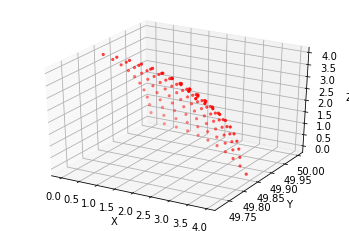

In [14]:
import numpy as np
import plotly.express as px
import pandas as pd
import serial
import time
from enum import Enum
import json
from radar_configuration import Radar
from threading import Thread
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

stepAngle = 0.45

scanningLowerStepSize = 5
scanningUpperStepSize = 2

maxAngleUpper = 22.5
maxStepsOfUpper = maxAngleUpper/(stepAngle*scanningUpperStepSize)

maxAngleLower = 22.5
maxStepsOfLower = maxAngleLower/(stepAngle*scanningLowerStepSize)

calibrateLowerStepSize = 10
calibrateLowerTotalStepsCount = 20



configuration_file = open('configuration.json',)
configuration_json = json.load(configuration_file)
arduino_port = configuration_json["ARDUINO_PORT"]


class Motors(Enum):
    LOWER = 'l'
    UPPER = 'u'


class Direction(Enum):
    POSITIVE = 1
    NEGATIVE = -1



# radar = Radar()
# global_distance = -1
# def get_readings_thread():
#     global global_distadnce
#     while(True):
#         global_distance = radar.get_median_distance(3)
#         print("global distance = ",global_distance)


def set_up():
    arduino = serial.Serial()
    arduino.baudrate = 9600
    arduino.port = arduino_port
    arduino.open()
    print(arduino.is_open)
    print(arduino.readline())
    return arduino


"""
if face was found return the direction of the lower motor 
else return none
"""


def calibrateLower():    
    detect = False
    count = 0
    # looping until face is found or rotated 90 degrees to the right
    while(count < calibrateLowerTotalStepsCount):
        moveMotor(Motors.LOWER.value, calibrateLowerStepSize,
                  Direction.POSITIVE.value)
        count += 1
        result = radar.get_median_distance(1) 
        if result != -1:
            detect = True
                 
        if(detect):
            return Direction.POSITIVE.value  # return that a face is found when rotating right
    moveMotor(Motors.LOWER.value, calibrateLowerStepSize *
              calibrateLowerTotalStepsCount, Direction.NEGATIVE.value)
    count = 0
    # looping until face is found or rotated 90 degrees to the left
    while(not detect and count > -1 * calibrateLowerTotalStepsCount):
        moveMotor(Motors.LOWER.value, calibrateLowerStepSize,
                  Direction.NEGATIVE.value)
        count -= 1
        result = radar.get_median_distance(1) 
        if result != -1:
            detect = True
        if(detect):
            return Direction.NEGATIVE.value  # return that a face is found when rotating left
    return None


"""
Moves motor in arduino
motor --> can be either 'l' for lower motor 
          or  'u' for upper motor
stepSize --> (integer) number of steps that the motor will move (step = 0.45 angle)
direction -->  either -1 or 1 
"""


def moveMotor(motor: Motors, stepSize, direction: Direction):
    txt = motor + str(direction * stepSize) + "$"
    arduino.write(bytes(txt, 'utf-8'))
    time.sleep(.1)
    arduino.readline()


def scanFace(lowerDirection):
    global global_distance
    upperDirection = True
    
    moveU = True
    moveL = True
    uCounter = 0
    lCounter = 0
    count = 0
    dResult =[]
    uResult = []
    lResult = []
    while(moveL):

        while(moveU):
            if(upperDirection):
                moveMotor(Motors.UPPER.value, scanningUpperStepSize,
                          Direction.POSITIVE.value)
                uCounter += 1
                count+=1
            else:
                moveMotor(Motors.UPPER.value, scanningUpperStepSize,
                          Direction.NEGATIVE.value)
                uCounter -= 1
                count+=1
            
            distance = 50#global_distance
            print("######################################")
            print("upperMoter.distance = ",distance)
            print("upperMoter.count = ",count)
            print("upperMoter.uCounter = ",uCounter)
            print("upperMoter.lCounter = ",lCounter)
            print("######################################")
            if (distance != -1):
                dResult.append(distance)
                uResult.append((uCounter * 0.45*np.pi)/180)
                lResult.append((lCounter * 0.45*np.pi)/180)
            # if distance >= min_distance and distance <= max_distance:
            #     detect = True
            #     print(distance)
            #     moveU = True
            # else:
            #     moveU = False
            print("upperMoter.count = ",count)
            if count == maxStepsOfUpper:
                moveU = False
                count = 0
        moveU = True
        upperDirection = not upperDirection
        # if(upperDirection):
        #     moveMotor(Motors.UPPER.value, scanningUpperStepSize,
        #               Direction.POSITIVE.value)
        #     uCounter += 1
        # else:
        #     moveMotor(Motors.UPPER.value, scanningUpperStepSize,
        #               Direction.NEGATIVE.value)
        #     uCounter -= 1

        moveMotor(Motors.LOWER.value, scanningLowerStepSize, lowerDirection)
        lCounter += 1
        distance = 50#global_distance
        if (distance != -1):
            dResult.append(distance)
            uResult.append((uCounter * 0.45*np.pi)/180)
            lResult.append((lCounter * 0.45*np.pi)/180)
        if lCounter == maxStepsOfLower:
            moveL = False
        # if distance >= min_distance and distance <= max_distance:
        #     detect = True
        #     print(distance)
        #     moveL = True
        # else:
        #     moveL = False
        #     print("noooooooooooooooooooo")
        #     print(distance)
        #     print("noooooooooooooooooooo")

    return dResult,uResult,lResult

if __name__ == "__main__":
    

    arduino = set_up()
    # setting upp arduino ports
#     t1 = Thread(target=get_readings_thread,daemon=False)
#     t1.start()
#     move_with_keyboard ()
   

    # moves the sensor in lower direction (XY plane) until the face is found
    
    # lowerDirection = calibrateLower()
    lowerDirection = 1
    dist = []
    uAngel =[]
    lAngel = []
    if(lowerDirection is None):
        moveMotor(Motors.LOWER.value, maxStepsOfLower,
                  Direction.POSITIVE.value)
    else:
        dist,uAngel,lAngel = scanFace(lowerDirection)
    
        x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)
        print(x)
        print(y)
        print(z)

        my_sample_x = np.array(x)
        my_sample_y = np.array(y)
        my_sample_z = np.array(z)
        
        print ("size of the my_sample_x before drawing :: ",len(my_sample_x))
        print ("size of the my_sample_y before drawing :: ",len(my_sample_y))
        print ("size of the my_sample_z before drawing :: ",len(my_sample_z))
        fig = plt.figure()
        ax = fig.add_subplot(111,projection="3d")
        ax.scatter (my_sample_x,my_sample_y, my_sample_z, s=5, c="r", marker = 'o')
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
#         ax.set_xlim(-100, 100)
#         ax.set_ylim(-100, 100)
#         ax.set_zlim(-100, 100)
        plt.show()

In [13]:
def move_with_keyboard ():
    
    val = ""
    
    while val != "e":
        val = input("Enter your value: ") 
        if (val == "d"):
            moveMotor(Motors.LOWER.value, scanningLowerStepSize, Direction.POSITIVE.value)
        elif (val == "a"):
            moveMotor(Motors.LOWER.value, scanningLowerStepSize, Direction.NEGATIVE.value)
        elif (val == "w"):
            moveMotor(Motors.UPPER.value, scanningUpperStepSize, Direction.NEGATIVE.value)
        elif (val == "s"):
            moveMotor(Motors.UPPER.value, scanningUpperStepSize, Direction.POSITIVE.value)
move_with_keyboard ()

Enter your value: e


In [ ]:
def move_with_keyboard ():
    global global_distance
    val = ""
    uCounter = 0
    lCounter = 0
    xArr = []
    yArr = []
    zArr = []
    fig = plt.figure()
    ax = fig.add_subplot(111,projection="3d")
    
    while val != "e":
        val = input("Enter your value: ") 
        if (val == "d"):
            moveMotor(Motors.LOWER.value, scanningLowerStepSize, Direction.POSITIVE.value)
            lCounter += 1
        elif (val == "a"):
            moveMotor(Motors.LOWER.value, scanningLowerStepSize, Direction.NEGATIVE.value)
            lCounter -= 1
        elif (val == "w"):
            moveMotor(Motors.UPPER.value, scanningUpperStepSize, Direction.NEGATIVE.value)
            uCounter += 1
        elif (val == "s"):
            moveMotor(Motors.UPPER.value, scanningUpperStepSize, Direction.POSITIVE.value)
            uCounter -= 1
#         dist = global_distance
#         uAngel = (uCounter * 0.45*np.pi)/180
#         lAngel = (lCounter * 0.45*np.pi)/180
#         x , y , z = dist*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)
#         xArr.append(x)
#         yArr.append(y)
#         zArr.append(z)
#         # fig = plt.figure()
#         # ax = fig.add_subplot(111,projection="3d")
#         my_sample_x = np.array(xArr)
#         my_sample_y = np.array(yArr)
#         my_sample_z = np.array(zArr)
#         # ax.scatter (my_sample_x,my_sample_y, my_sample_z, s=5, c="r", marker = 'o')
#         # ax.set_xlabel("X")
#         # ax.set_ylabel("Y")
#         # ax.set_zlabel("Z")
#         # ax.set_xlim(-300, 300)
#         # ax.set_ylim(-300, 300)
#         # ax.set_zlim(-300, 300)
#         # plt.show()
        
#         cat_g = ['setosa']
#         sample_cat = [cat_g[np.random.randint(0,1)] for i in range (len(my_sample_z))]

#         df = pd.DataFrame(my_sample_x,columns=['sepal_length'])
#         df['sepal_width'] = my_sample_y
#         df['petal_width'] = my_sample_z
#         df['species'] = sample_cat
#         df.head()
#         fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
#                 color='species',range_x = [-500,500],range_y = [-500,500],range_z=[-500,500])
#         fig.show()

In [ ]:
#         cat_g = ['setosa']
#         sample_cat = [cat_g[np.random.randint(0,1)] for i in range (len(my_sample_z))]

#         df = pd.DataFrame(my_sample_x,columns=['sepal_length'])
#         df['sepal_width'] = my_sample_y
#         df['petal_width'] = my_sample_z
#         df['species'] = sample_cat
#         df.head()
#         fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
#                 color='species',range_x = [-500,500],range_y = [-500,500],range_z=[-500,500])
#         fig.show()